In [2]:
import pyfits
import os
import numpy as np
import matplotlib.pyplot as plt
import numpy.ma as ma
from astropy.cosmology import WMAP9 as cosmo
import matplotlib
import math
from scipy import ndimage
from scipy.ndimage.morphology import generate_binary_structure, binary_erosion
from scipy.ndimage import iterate_structure
from scipy.ndimage.filters import maximum_filter
import scipy.optimize as opt
from astropy.convolution import Gaussian2DKernel
from astropy.convolution import convolve
from astropy.io import fits
import math
import photutils
import statmorph
from skimage import measure
from bresenham import bresenham
from photutils import CircularAperture,aperture_photometry
import cv2
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp



print('compiled')


compiled


/Users/beckynevin/Documents/Backup_My_Book/My_Passport_backup/Kinematics
myr, view 190 0


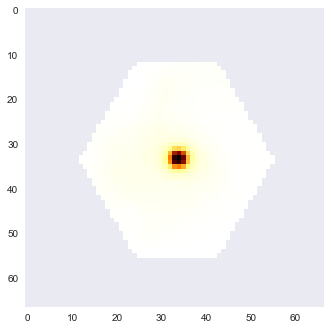

<Figure size 576x396 with 0 Axes>

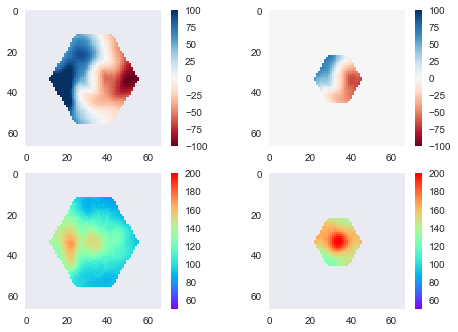

myr, view 190 1


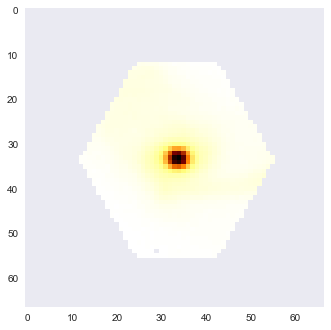

<Figure size 576x396 with 0 Axes>

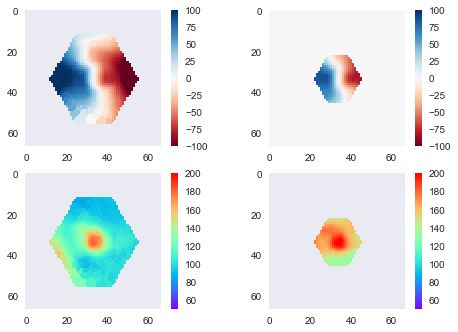

myr, view 190 2


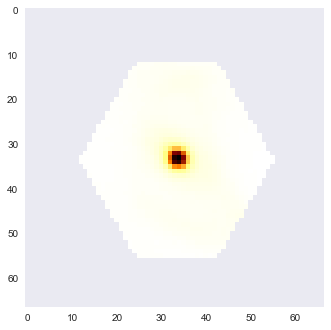

<Figure size 576x396 with 0 Axes>

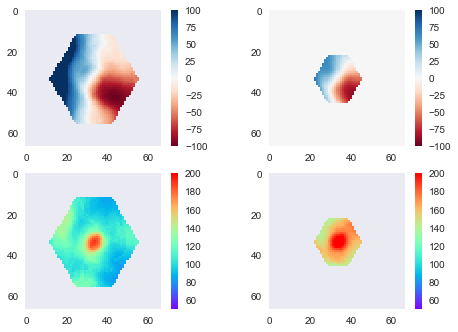

myr, view 190 3
myr, view 190 4


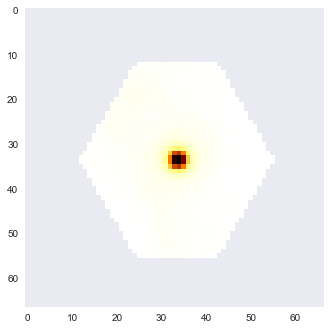

<Figure size 576x396 with 0 Axes>

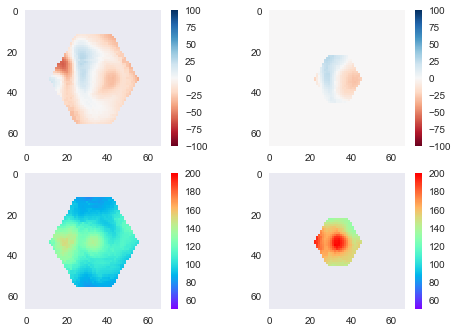

myr, view 190 5
myr, view 190 6


In [9]:
import os
print(os.getcwd())

os.chdir(os.path.expanduser('/Users/beckynevin/Documents/Backup_My_Book/My_Passport_backup/Kinematics/'))

import seaborn as sns
sns.set_style("dark")




myr_list=[190]# 240,  5,60]#,10,20,30,40,50,60,100,200]
view_list=[0,1,2,3,4,5,6]

#view_list=[2]
#myr_list=[90]



adds='NONSCATTER_kin_correct_noise_conv'#stellar_kinematics_NONSCATTER_kin_correct_noi
adds_fix='SCATTER_kin_correct_noise_conv'
run='fg3_m12_agnx0'
run_fix='fg3_m12_agnx0'#fixbug




plt.clf()
counter=0
z=0.03

for i in range(len(myr_list)):
    myr=myr_list[i]
    v_offsets=[]
    for j in range(len(view_list)):
        im=0
        view=view_list[j]
        print('myr, view', myr, view)
        if run=='fg3_m10':
            if myr > 420:
                im = pyfits.open('../LAURA_Sims/q0.1_fg0.3_BT0.2_allrx10_sunruns/hires_kin_late/broadband_'+str(myr)+'.fits')
            else:
                if myr < 10:
                    im = pyfits.open('../LAURA_Sims/q0.1_fg0.3_BT0.2_allrx10_sunruns/hires_kin_early_cen1/broadband_00'+str(myr)+'.fits')
                else:
                    if myr < 100:
                        im = pyfits.open('../LAURA_Sims/q0.1_fg0.3_BT0.2_allrx10_sunruns/hires_kin_early_cen1/broadband_0'+str(myr)+'.fits')
                    else:
                        im = pyfits.open('../LAURA_Sims/q0.1_fg0.3_BT0.2_allrx10_sunruns/hires_kin_early_cen1/broadband_'+str(myr)+'.fits')
        
        
        if run=='fg3_m13':
            if myr > 140:
                im = pyfits.open('../LAURA_Sims/q0.333_fg0.3_allrx10_sunruns/hires_kin_late/broadband_'+str(myr)+'.fits')
            else:
                if myr < 10:
                    im = pyfits.open('../LAURA_Sims/q0.333_fg0.3_allrx10_sunruns/hires_kin_early_cen1/broadband_00'+str(myr)+'.fits')
                else:
                    if myr < 100:
                        im = pyfits.open('../LAURA_Sims/q0.333_fg0.3_allrx10_sunruns/hires_kin_early_cen1/broadband_0'+str(myr)+'.fits')
                    else:
                        im = pyfits.open('../LAURA_Sims/q0.333_fg0.3_allrx10_sunruns/hires_kin_early_cen1/broadband_'+str(myr)+'.fits')
        
        if run=='fg3_m12_iso0.5':
            if myr < 10:
                prefix='00'
            else:
                if myr < 100:
                    prefix='0'
                else:
                    prefix=''
            im = pyfits.open('../LAURA_Sims/isolated_galaxies/m0.5_fg0.3/broadband_'+prefix+str(myr)+'.fits')
            
        
        if run=='fg3_m12_iso1':
            if myr < 10:
                prefix='00'
            else:
                if myr < 100:
                    prefix='0'
                else:
                    prefix=''
            im = pyfits.open('../LAURA_Sims/isolated_galaxies/m1_fg0.3/broadband_'+prefix+str(myr)+'.fits')
            
        if run=='fg3_m12':
            if myr < 10:
                prefix='00'
            else:
                if myr < 100:
                    prefix='0'
                else:
                    prefix=''
            if myr < 170:
                im = pyfits.open('../LAURA_Sims/q0.5_fg0.3_allrx10_sunruns/hires_kin_early_cen1/broadband_'+prefix+str(myr)+'.fits')
            else:
                im = pyfits.open('../LAURA_Sims/q0.5_fg0.3_allrx10_sunruns/hires_kin/broadband_'+prefix+str(myr)+'.fits')
        if run=='fg3_m12_agnx0':
            im = pyfits.open('../LAURA_Sims/q0.5_fg0.3_allrx10_sunruns/agnx0/broadband_'+str(myr)+'.fits')
        
        if run=='fg3_m15_iso1':
            if myr < 10:
                prefix='00'
            else:
                if myr < 100:
                    prefix='0'
                else:
                    prefix=''
            im = pyfits.open('../LAURA_Sims/m1_fg0.3_BT0.2_allrx10_isolated_sunruns/broadband_'+prefix+str(myr)+'.fits')
        
        if run=='fg3_m15':
            if myr > 300:
                im = pyfits.open('../LAURA_Sims/q0.2_fg0.3_BT0.2_allrx10_sunruns/hires_kin_late/broadband_'+str(myr)+'.fits')
            else:
                if myr < 10:
                    im = pyfits.open('../LAURA_Sims/q0.2_fg0.3_BT0.2_allrx10_sunruns/hires_kin_early_cen1/broadband_00'+str(myr)+'.fits')
                else:
                    if myr < 100:
                        im = pyfits.open('../LAURA_Sims/q0.2_fg0.3_BT0.2_allrx10_sunruns/hires_kin_early_cen1/broadband_0'+str(myr)+'.fits')
                    else:
                        im = pyfits.open('../LAURA_Sims/q0.2_fg0.3_BT0.2_allrx10_sunruns/hires_kin_early_cen1/broadband_'+str(myr)+'.fits')
        if run=='fg1_m13':
            if myr < 10:
                prefix='00'
            else:
                if myr < 100:
                    prefix='0'
                else:
                    prefix=''
            if myr > 140:
                
                if myr <360:
                    im = pyfits.open('../LAURA_Sims/q0.333_fg0.1_allrx10_sunruns/hires_kin_late/broadband_sdss_z0.03_'+prefix+str(myr)+'.fits')
                else:
                    im = pyfits.open('../LAURA_Sims/q0.333_fg0.1_allrx10_sunruns/hires_kin_late/broadband_'+prefix+str(myr)+'.fits')
            
            else:
                im = pyfits.open('../LAURA_Sims/q0.333_fg0.1_allrx10_sunruns/hires_kin_early_cen1/broadband_'+prefix+str(myr)+'.fits')
            
        if run=='fg1_m13_iso1':
            if myr < 10:
                prefix='00'
            else:
                if myr < 100:
                    prefix='0'
                else:
                    prefix=''
            im = pyfits.open('../LAURA_Sims/isolated_galaxies/m1_fg0.1/broadband_'+prefix+str(myr)+'.fits')
        if run=='fg1_m13_iso0.333':
            if myr < 10:
                prefix='00'
            else:
                if myr < 100:
                    prefix='0'
                else:
                    prefix=''
            im = pyfits.open('../LAURA_Sims/isolated_galaxies/m0.333_fg0.1/broadband_'+prefix+str(myr)+'.fits')
            
        
        #try:
        #print(os.getcwd())
        try:
            kin_cube=pyfits.open('stellar_kinematics_'+str(adds)+'_'+str(run)+'_'+str(myr)+'_'+str(view)+'.fits')
            kin_cube_fix=pyfits.open('stellar_kinematics_'+str(adds_fix)+'_'+str(run_fix)+'_'+str(myr)+'_'+str(view)+'.fits')
          
        except FileNotFoundError:
            continue
          
        '''except FileNotFoundError:
            print('STELLAR velocity map not there yet', 'stellar_kinematics_'+str(adds)+'_'+str(run)+'_'+str(myr)+'_'+str(view)+'.fits')
            print(os.getcwd())
            continue'''
        
        dia = np.where(kin_cube[1].data != 0.0)
        dia_pix = (dia[1].max()-dia[1].min())#this is the number of pixels
        dia = dia_pix*0.5#because 0.5" per spaxel
        
        
        vel = ma.masked_where(kin_cube[1].data==0, kin_cube[1].data)
        vel_e = ma.masked_where(kin_cube[2].data==0, kin_cube[2].data)
        sig = ma.masked_where(kin_cube[3].data==0, kin_cube[3].data)
        sig_e = ma.masked_where(kin_cube[4].data==0, kin_cube[4].data)
        r_band = kin_cube[5].data
        r_band = ma.masked_where(r_band>1e10, r_band)
        
        vel = ma.masked_where(abs(vel)>1000, vel)
        vel_e = ma.masked_where(abs(vel)>1000, vel_e)
        
        
        vel_fix = ma.masked_where(kin_cube_fix[1].data==0, kin_cube_fix[1].data)
        vel_e_fix = ma.masked_where(kin_cube_fix[2].data==0, kin_cube_fix[2].data)
        sig_fix = ma.masked_where(kin_cube_fix[3].data==0, kin_cube_fix[3].data)
        sig_e_fix = ma.masked_where(kin_cube_fix[4].data==0, kin_cube_fix[4].data)
        
        vel_fix = ma.masked_where(abs(vel_fix)>1000, vel_fix)
        vel_e_fix = ma.masked_where(abs(vel_fix)>1000, vel_e_fix)
        
        plt.clf()
        plt.imshow(r_band, cmap='afmhot_r')
        plt.show()
        
        plt.clf()
        fig=plt.figure()
        ax0 = fig.add_subplot(221)
        im0 = ax0.imshow(vel, cmap='RdBu', vmin=-100, vmax=100)
        plt.colorbar(im0)
        
        ax1 = fig.add_subplot(222)
        im1 = ax1.imshow(vel_fix, cmap='RdBu', vmin=-100, vmax=100)
        plt.colorbar(im1)
        
        ax2 = fig.add_subplot(223)
        im2 = ax2.imshow(sig, cmap='rainbow', vmin=50, vmax=200)
        plt.colorbar(im2)
        
        ax3 = fig.add_subplot(224)
        im3 = ax3.imshow(sig_fix, cmap='rainbow', vmin=50, vmax=200)
        plt.colorbar(im3)
        plt.show()
        
        